# 1. Les packages

In [1]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

In [2]:
# Importer les données
data_disponibité = pd.read_csv(r"C:\Users\diarr\Downloads\P9\DisponibiliteAlimentaire_2017.csv")
data_population = pd.read_csv(r"C:\Users\diarr\Downloads\P9\Population_2000_2018.csv")

## 2.1. Exploration des données

* Dans cette étape nous allons explorer une par une tous les DataFrames pour en extraire des informations , 
* Revoir la structure des données ainsi faire une courte analyse par la suite.

### 2.1.1. Dataframe "Disponibilité Alimentaire"

In [3]:
# Observation des 5 premiers lignes de l'échantillon
data_disponibité.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# Forme du jeu de donnés
data_disponibité.shape

(176600, 14)

* Nous avons enregistré 176600 disponibilités alimentaires mondiale c'est à dire chaque ligne représente une disponibilité par pays (zone) avec 14 caractéristiques (colonnes).

In [5]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_disponibité.isnull().sum()/data_disponibité.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

* On observe l'absence de valeurs manquantes.

In [6]:
# Vérification des doublons
data_disponibité[data_disponibité.duplicated()].shape

(0, 14)

In [7]:
# Vérification des doublons
data_disponibité[data_disponibité.duplicated(["Zone"])].shape

(176426, 14)

* Nous n'avons pas observés la présence de doublons dans la table.

In [8]:
# Typages de données
info_dispo = data_disponibité.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

* Pas de valeurs manquantes et les données (dans la colonne) sont au bon format (types de données).

In [9]:
# Statistiques descriptives avec toutes les variables
statistique = data_disponibité.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Code Domaine,176600,1,FBS,176600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domaine,176600,1,Nouveaux Bilans Alimentaire,176600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code zone,176600.0,NaN,NaN,NaN,125.47474,72.941699,1.0,63.0,120.0,188.0,276.0
Zone,176600,174,Tchad,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code Élément,176600.0,NaN,NaN,NaN,3810.052894,2211.790089,645.0,684.0,5142.0,5301.0,5911.0
Élément,176600,17,Disponibilité intérieure,15905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code Produit,176600.0,NaN,NaN,NaN,2628.778545,91.993247,2511.0,2556.0,2612.0,2732.0,2899.0
Produit,176600,98,Maïs et produits,2593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code année,176600.0,NaN,NaN,NaN,2017.0,0.0,2017.0,2017.0,2017.0,2017.0,2017.0
Année,176600.0,NaN,NaN,NaN,2017.0,0.0,2017.0,2017.0,2017.0,2017.0,2017.0


In [10]:
# Statistiques descriptives avec les variables némériques 
statistique = data_disponibité.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Code zone,176600.0,125.474740,72.941699,1.0,63.0,120.00,188.0000,276.0
Code Élément,176600.0,3810.052894,2211.790089,645.0,684.0,5142.00,5301.0000,5911.0
Code Produit,176600.0,2628.778545,91.993247,2511.0,2556.0,2612.00,2732.0000,2899.0
Code année,176600.0,2017.000000,0.000000,2017.0,2017.0,2017.00,2017.0000,2017.0
Année,176600.0,2017.000000,0.000000,2017.0,2017.0,2017.00,2017.0000,2017.0
Valeur,176600.0,210.554918,4762.047787,-10388.0,0.0,0.12,8.4625,758548.0


In [11]:
# pour trouver les éléments unique de la colonne
data_disponibité["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [12]:
# pour trouver les éléments nunique de la colonne
data_disponibité["Élément"].nunique()

17

In [13]:
# pour trouver les éléments unique de la colonne
data_disponibité["Unité"].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [14]:
# pour trouver les éléments unique de la colonne
data_disponibité["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

* Après parcours de la table "disponibilité alimentaire", nous allons créer un nouveau dataframe pour sélectionner les variables qui nous semblent pertinentes pour la suite de notre analyse.

In [15]:
# Création d'un nouveau dataframe
data_dispo = data_disponibité[["Zone", "Élément", "Produit", "Valeur", "Unité", "Année"]]	
data_dispo.head(5)

,Zone,Élément,Produit,Valeur,Unité,Année
0,Afghanistan,Production,Blé et produits,4281.0,Milliers de tonnes,2017
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0,Milliers de tonnes,2017
2,Afghanistan,Variation de stock,Blé et produits,-119.0,Milliers de tonnes,2017
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0,Milliers de tonnes,2017
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0,Milliers de tonnes,2017


* Après la création du nouveau dataframe, intéressons nous aux colonnes "Unité" et "Élément" .
* Nous allons créer un mask pour en savoir plus sur les différentes unités pour chaque ligne de ces deux colonnes.

In [16]:
# Création d'une mask
data_tonnes = data_dispo[data_dispo["Unité"] == 'Milliers de tonnes']
data_tonnes

,Zone,Élément,Produit,Valeur,Unité,Année
0,Afghanistan,Production,Blé et produits,4281.0,Milliers de tonnes,2017
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0,Milliers de tonnes,2017
2,Afghanistan,Variation de stock,Blé et produits,-119.0,Milliers de tonnes,2017
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0,Milliers de tonnes,2017
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0,Milliers de tonnes,2017
...,...,...,...,...,...,...
176591,Zimbabwe,Exportations - Quantité,Miscellanees,1.0,Milliers de tonnes,2017
176592,Zimbabwe,Disponibilité intérieure,Miscellanees,19.0,Milliers de tonnes,2017
176593,Zimbabwe,Alimentation pour touristes,Miscellanees,0.0,Milliers de tonnes,2017
176594,Zimbabwe,Résidus,Miscellanees,0.0,Milliers de tonnes,2017


In [17]:
# Création d'une mask
data_kilo = data_dispo[data_dispo["Unité"] == 'Kg']
data_kilo

,Zone,Élément,Produit,Valeur,Unité,Année


In [18]:
# Création d'une mask
data_kcal = data_dispo[data_dispo["Unité"] == 'Kcal/personne/jour']
data_kcal

,Zone,Élément,Produit,Valeur,Unité,Année
11,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Blé et produits,1331.0,Kcal/personne/jour,2017
24,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Riz et produits,135.0,Kcal/personne/jour,2017
38,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Orge et produits,5.0,Kcal/personne/jour,2017
52,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Maïs et produits,11.0,Kcal/personne/jour,2017
77,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Millet et produits,2.0,Kcal/personne/jour,2017
...,...,...,...,...,...,...
176562,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Mollusques, Autres",0.0,Kcal/personne/jour,2017
176570,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Animaux Aquatiques Autre,0.0,Kcal/personne/jour,2017
176578,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Plantes Aquatiques,0.0,Kcal/personne/jour,2017
176587,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Aliments pour enfants,0.0,Kcal/personne/jour,2017


In [19]:
# Création d'une mask
data_gramme = data_dispo[data_dispo["Unité"] == 'g/personne/jour']
data_gramme

,Zone,Élément,Produit,Valeur,Unité,Année
12,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Blé et produits,35.88,g/personne/jour,2017
13,Afghanistan,Disponibilité de matière grasse en quantité (g...,Blé et produits,4.47,g/personne/jour,2017
25,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Riz et produits,2.58,g/personne/jour,2017
26,Afghanistan,Disponibilité de matière grasse en quantité (g...,Riz et produits,0.25,g/personne/jour,2017
39,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Orge et produits,0.14,g/personne/jour,2017
...,...,...,...,...,...,...
176580,Zimbabwe,Disponibilité de matière grasse en quantité (g...,Plantes Aquatiques,0.00,g/personne/jour,2017
176588,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Aliments pour enfants,0.01,g/personne/jour,2017
176589,Zimbabwe,Disponibilité de matière grasse en quantité (g...,Aliments pour enfants,0.00,g/personne/jour,2017
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,0.04,g/personne/jour,2017


* Les valeurs sont exprimées en différente unité ( voir au dessus) avec les différents dataframes obtenus sous forme de mask.
* Nous avons aussi la lexique des données en notre disposition pour comprendre les différentes aggrégations faites sur certaines des variables.

### Lexique des données

#####  La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.
*    Disponibilité alimentaire = Production + Importations - Exportations + Variation des stocks
*** 
#####  La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays( totale disponibilité alimentaire).
#####   La colonne nourriture correspond à la disponibilité de l'alimentation humaine c'est à sa consommation.
*    Disponibilité pour l'alimentation humaine = Totale Disponibilité alimentaire - Alimentation animale - Semences – Traitement - Autres utilisations – Pertes
* Avec Disponibilité pour l'alimentation humaine = Disponibilité alimentaire pour la consommation 
*** 
Sources: https://www.fao.org/fileadmin/templates/ess/CountrySTAT/Douala_training_2012/BA_CountrySTAT_13Nov2012.pdf

* D'après la lexique des données 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
* Dans ce cas on va multiplier la colonne "Valeur" par 1000000 qui correspond pour un millier de tonnes = 1000000kg.
* Ensuite créer un mask sur la colonne "Produit" pour selectionner uniquement les lignes où le "Produit" == 'Viande de Volailles'

In [20]:
# Multiplier toute la colonne "Valeur" par 1000000
data_dispo["Valeur"] = data_dispo["Valeur"] * 1000000
data_dispo.head(5)

,Zone,Élément,Produit,Valeur,Unité,Année
0,Afghanistan,Production,Blé et produits,4.281000e+09,Milliers de tonnes,2017
1,Afghanistan,Importations - Quantité,Blé et produits,2.302000e+09,Milliers de tonnes,2017
2,Afghanistan,Variation de stock,Blé et produits,-1.190000e+08,Milliers de tonnes,2017
3,Afghanistan,Exportations - Quantité,Blé et produits,0.000000e+00,Milliers de tonnes,2017
4,Afghanistan,Disponibilité intérieure,Blé et produits,6.701000e+09,Milliers de tonnes,2017


* Maintenant nous allons créer un tableau croisé dynamique avec la fonction "pivot_table" pour mettre les éléments de la colonne "Élément" en colonne.
* Ensuite garder certaines colonnes pour la disponibilité alimentaire;
* Et enfin créer un autre dataframe (créer un mask) pour la disponibilité de poulet.

In [21]:
# Création du tableau croisé dynamique
data_dispo_alim = data_dispo.pivot_table(values = "Valeur",
                                      index = "Zone",
                                      columns = "Élément",
                                      aggfunc =  np.sum)

# afficher le tableau croisé
# data_dispo = data_dispo.reset_index()
data_dispo_alim = data_dispo_alim
print(data_dispo_alim.shape)
data_dispo_alim.head(5)

(174, 17)


Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,4.560000e+08,9.400000e+07,1.997000e+09,3.573100e+08,30630000.0,54090000.0,1.513900e+10,6.010000e+08,4.555000e+09,1.296800e+10,1.146000e+09,1.160900e+10,-111000000.0,4.700000e+08,1.150000e+08,426000000.0
Afrique du Sud,0.0,9.371000e+09,1.448000e+09,2.987000e+09,5.564200e+08,81920000.0,83360000.0,6.684000e+10,1.096800e+10,9.020000e+09,3.172600e+10,3.108000e+09,6.845500e+10,-594000000.0,2.120000e+08,2.156400e+10,-322000000.0
Albanie,NaN,6.970000e+08,1.770000e+08,3.400000e+09,1.260490e+09,117570000.0,119500000.0,4.879000e+09,1.560000e+08,8.840000e+08,3.631000e+09,3.210000e+08,4.231000e+09,-115000000.0,5.300000e+07,1.130000e+08,72000000.0
Algérie,0.0,4.884000e+09,2.405000e+09,3.345000e+09,7.987100e+08,79620000.0,92850000.0,4.536500e+10,7.430000e+08,1.971800e+10,3.305600e+10,3.683000e+09,2.676300e+10,-22000000.0,3.580000e+08,9.930000e+08,374000000.0
Allemagne,NaN,3.090400e+10,8.316000e+09,3.559000e+09,9.432400e+08,147960000.0,104070000.0,1.749600e+11,5.879300e+10,6.655000e+10,7.798800e+10,5.756000e+09,1.678280e+11,-831000000.0,1.712000e+09,5.110900e+10,651000000.0


In [22]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_dispo_alim.isnull().sum()/data_dispo_alim.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Élément
Alimentation pour touristes                                      54.60
Pertes                                                            2.30
Traitement                                                        2.30
Semences                                                          2.30
Résidus                                                           2.30
Disponibilité alimentaire (Kcal/personne/jour)                    1.15
Disponibilité alimentaire en quantité (kg/personne/an)            1.15
Disponibilité de matière grasse en quantité (g/personne/jour)     1.15
Disponibilité de protéines en quantité (g/personne/jour)          1.15
Production                                                        0.00
Exportations - Quantité                                           0.00
Nourriture                                                        0.00
Importations - Quantité                                           0.00
Aliments pour animaux                                             0.0

In [23]:
# Pourcentages des valeurs nulles
valeur_null = data_dispo_alim.isnull().sum()
valeur_null

Élément
Alimentation pour touristes                                      95
Aliments pour animaux                                             0
Autres utilisations (non alimentaire)                             0
Disponibilité alimentaire (Kcal/personne/jour)                    2
Disponibilité alimentaire en quantité (kg/personne/an)            2
Disponibilité de matière grasse en quantité (g/personne/jour)     2
Disponibilité de protéines en quantité (g/personne/jour)          2
Disponibilité intérieure                                          0
Exportations - Quantité                                           0
Importations - Quantité                                           0
Nourriture                                                        0
Pertes                                                            4
Production                                                        0
Résidus                                                           4
Semences                                

In [24]:
# Dataframe disponibilité alimentaire
data_dispo_alim = data_dispo_alim[["Disponibilité alimentaire en quantité (kg/personne/an)", "Production", 
                         "Importations - Quantité","Exportations - Quantité", "Nourriture", "Disponibilité intérieure"]]
data_dispo_alim.head(5)

Élément,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité intérieure
Zone,,,,,,
Afghanistan,3.573100e+08,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10
Afrique du Sud,5.564200e+08,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10
Albanie,1.260490e+09,4.231000e+09,8.840000e+08,1.560000e+08,3.631000e+09,4.879000e+09
Algérie,7.987100e+08,2.676300e+10,1.971800e+10,7.430000e+08,3.305600e+10,4.536500e+10
Allemagne,9.432400e+08,1.678280e+11,6.655000e+10,5.879300e+10,7.798800e+10,1.749600e+11


In [25]:
# Renommer les colonnes
data_dispo_alim = data_dispo_alim.rename(columns = {"Disponibilité alimentaire en quantité (kg/personne/an)": "Consommation-Personnelle (kg/pers/an)",
                                          "Production" : "Production-Totale", "Importations - Quantité" : "Importations-Totale",
                                          "Exportations - Quantité" : "Exportations-Totale", "Nourriture" : "Consommation-Totale",
                                        "Disponibilité intérieure" : "Disponibilité-Intérieure-Totale"})
data_dispo_alim.head(2)

Élément,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale
Zone,,,,,,
Afghanistan,357310000.0,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10
Afrique du Sud,556420000.0,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10


In [26]:
# Création d'une mask
data_dispo_poulet = data_dispo[data_dispo["Produit"] == 'Viande de Volailles'].reset_index(drop = "True")
data_dispo_poulet

,Zone,Élément,Produit,Valeur,Unité,Année
0,Afghanistan,Production,Viande de Volailles,28000000.0,Milliers de tonnes,2017
1,Afghanistan,Importations - Quantité,Viande de Volailles,29000000.0,Milliers de tonnes,2017
2,Afghanistan,Variation de stock,Viande de Volailles,0.0,Milliers de tonnes,2017
3,Afghanistan,Disponibilité intérieure,Viande de Volailles,57000000.0,Milliers de tonnes,2017
4,Afghanistan,Pertes,Viande de Volailles,2000000.0,Milliers de tonnes,2017
...,...,...,...,...,...,...
2056,Zimbabwe,Nourriture,Viande de Volailles,67000000.0,Milliers de tonnes,2017
2057,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4680000.0,kg,2017
2058,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16000000.0,Kcal/personne/jour,2017
2059,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,1590000.0,g/personne/jour,2017


In [27]:
# Création du tableau croisé dynamique
data_dispo_poulet = data_dispo_poulet.pivot_table(values = "Valeur",
                                      index = "Zone",
                                      columns = "Élément",
                                      aggfunc =  np.sum)

# afficher le tableau croisé
# data_dispo = data_dispo.reset_index()
data_dispo_poulet = data_dispo_poulet
print(data_dispo_poulet.shape)
data_dispo_poulet.head(5)

(172, 17)


Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5000000.0,1530000.0,330000.0,540000.0,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143000000.0,35690000.0,9250000.0,14110000.0,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85000000.0,16360000.0,6450000.0,6260000.0,4.700000e+07,0.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
Algérie,0.0,NaN,NaN,22000000.0,6380000.0,1500000.0,1970000.0,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71000000.0,19470000.0,4160000.0,7960000.0,1.739000e+09,646000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0


In [28]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_dispo_poulet.isnull().sum()/data_dispo_poulet.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Élément
Aliments pour animaux                                            99.42
Semences                                                         99.42
Autres utilisations (non alimentaire)                            80.23
Traitement                                                       73.26
Pertes                                                           61.05
Alimentation pour touristes                                      54.65
Exportations - Quantité                                          21.51
Résidus                                                           4.65
Production                                                        2.33
Variation de stock                                                1.74
Disponibilité intérieure                                          1.16
Importations - Quantité                                           1.16
Nourriture                                                        1.16
Disponibilité de protéines en quantité (g/personne/jour)          0.0

In [29]:
# Pourcentages des valeurs nulles
valeur_null = data_dispo_poulet.isnull().sum()
valeur_null

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

* Nous avions 37 valeurs manquantes dans la colonne "Exportations - Quantité", 
* D'après la lexique des données, nous avons cette formule : Exportations = Production + Importations + Variation des stocks - Disponibilité alimentaire, 
* Pour celà nous allons utiliser la fonction lambda pour remplacer ces valeurs manquantes.

In [30]:
# Remplacer les valeurs manquantes de la colonne 'Exportations - Quantité'
data_dispo_poulet['Exportations - Quantité'] = data_dispo_poulet.apply(lambda x : ((x['Production'] + x['Importations - Quantité'] 
                                                                       - x['Disponibilité alimentaire en quantité (kg/personne/an)'] 
                                                                       + x['Variation de stock']) - x['Disponibilité intérieure']) 
                                                          if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis = 1)

In [31]:
# Dataframe disponibilité alimentaire
data_dispo_poulet = data_dispo_poulet[["Production", "Importations - Quantité","Exportations - Quantité", 
                                       "Nourriture", "Disponibilité intérieure"]]
data_dispo_poulet.head(5)

Élément,Production,Importations - Quantité,Exportations - Quantité,Nourriture,Disponibilité intérieure
Zone,,,,,
Afghanistan,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07
Afrique du Sud,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09
Albanie,1.300000e+07,38000000.0,0.0,4.700000e+07,4.700000e+07
Algérie,2.750000e+08,2000000.0,0.0,2.640000e+08,2.770000e+08
Allemagne,1.514000e+09,842000000.0,646000000.0,1.609000e+09,1.739000e+09


In [32]:
# Renommer les colonnes
data_dispo_poulet = data_dispo_poulet.rename(columns = {"Production" : "Production-Poulet", "Importations - Quantité" : "Importations-Poulet",
                                          "Exportations - Quantité" : "Exportations-Poulet", "Nourriture" : "Consommation-Poulet",
                                        "Disponibilité intérieure" : "Disponibilité-Intérieure-Poulet"})
data_dispo_poulet.head(2)

Élément,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet
Zone,,,,,
Afghanistan,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07
Afrique du Sud,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09


* Après l'obtention des deux dataframes, nous allons faire une jointure.

In [33]:
# Jointure des deux dataframes
print(data_dispo_alim.shape)
print(data_dispo_poulet.shape)

# Jointure des deux dataframes
data_poulet_17 = pd.merge(data_dispo_alim, data_dispo_poulet, how = "inner", on = "Zone")

# afficher le dataframe après jointure
data_poulet_17 = data_poulet_17.reset_index()
data_poulet_17.head(5)

(174, 6)
(172, 5)


Élément,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet
0,Afghanistan,3.573100e+08,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07
1,Afrique du Sud,5.564200e+08,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09
2,Albanie,1.260490e+09,4.231000e+09,8.840000e+08,1.560000e+08,3.631000e+09,4.879000e+09,1.300000e+07,38000000.0,0.0,4.700000e+07,4.700000e+07
3,Algérie,7.987100e+08,2.676300e+10,1.971800e+10,7.430000e+08,3.305600e+10,4.536500e+10,2.750000e+08,2000000.0,0.0,2.640000e+08,2.770000e+08
4,Allemagne,9.432400e+08,1.678280e+11,6.655000e+10,5.879300e+10,7.798800e+10,1.749600e+11,1.514000e+09,842000000.0,646000000.0,1.609000e+09,1.739000e+09


In [34]:
# Supprimer les colonnes inutiles
#data_poulet_17 = data_poulet_17.drop(columns = ['Production-Totale', 'Importations-Totale', 'Exportations-Totale',
  #                                              'Consommation-Totale', 'Disponibilité-Intérieure-Totale'], axis = 1)
# Supprimer les colonnes inutiles
#data_poulet_17 = data_poulet_17.drop(columns = ["Importations-Poulet", "Exportations-Poulet", "Consommation-Poulet"], axis = 1)
#data_poulet_17 = data_poulet_17.drop(columns = ["Consommation-Personnelle (kg/pers/an)"], axis = 1)

* On peut faire du feature enegeneering c'est à dire créer de nouvelles variables (par exemple le % de consommation poulet )pour ajouter plus d'informations sur nos données.

In [35]:
"""# feature enegeneering (en créeant de nouvelles variables)

# % d'importation de poulets
data_poulet_17["Importations-Poulet (%)"] = round((data_poulet_17["Importations-Poulet"] / data_poulet_17["Importations-Totale"])*100, 2)

# % d'exportation de poulets
data_poulet_17["Exportations-Poulet (%)"] = round((data_poulet_17["Exportations-Poulet"] / data_poulet_17["Exportations-Totale"])*100, 2)

# % d'importation de poulets
data_poulet_17["Consommation-Poulet (%)"] = round((data_poulet_17["Consommation-Poulet"] / data_poulet_17["Consommation-Totale"])*100, 2)"""

'# feature enegeneering (en créeant de nouvelles variables)\n\n# % d\'importation de poulets\ndata_poulet_17["Importations-Poulet (%)"] = round((data_poulet_17["Importations-Poulet"] / data_poulet_17["Importations-Totale"])*100, 2)\n\n# % d\'exportation de poulets\ndata_poulet_17["Exportations-Poulet (%)"] = round((data_poulet_17["Exportations-Poulet"] / data_poulet_17["Exportations-Totale"])*100, 2)\n\n# % d\'importation de poulets\ndata_poulet_17["Consommation-Poulet (%)"] = round((data_poulet_17["Consommation-Poulet"] / data_poulet_17["Consommation-Totale"])*100, 2)'

### 2.1.2. Dataframe "Population"

In [36]:
# Observation des 5 premiers lignes de l'échantillon
data_population.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [37]:
# Forme du jeu de donnés
data_population.shape

(4411, 15)

* Nous avons 4411 pays (zones) avec 15 caractéristiques (colonnes).

In [38]:
##### Vérification des doublons
data_population[data_population.duplicated()].shape

(0, 15)

In [39]:
# Vérification des doublons
data_population[data_population.duplicated(["Zone"])].shape

(4173, 15)

* Nous n'avons pas de doublons dans la table.

In [40]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_population.isnull().sum()/data_population.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Note                      94.15
Code Domaine               0.00
Domaine                    0.00
Code zone                  0.00
Zone                       0.00
Code Élément               0.00
Élément                    0.00
Code Produit               0.00
Produit                    0.00
Code année                 0.00
Année                      0.00
Unité                      0.00
Valeur                     0.00
Symbole                    0.00
Description du Symbole     0.00
dtype: float64

* On observe 94% de valeurs manquantes avec la variable "Note" contrairement aux autres variables qui n'ont pas de valeurs manquantes.

In [41]:
# Typages de données
info_pop = data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

* Les données sont au bon format (typage des données).

In [42]:
# Statistiques descriptives avec toutes les variables
statistique = data_population.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Code zone,4411.0,132.202902,75.854840,1.000,68.000,132.000,195.000,299.000
Code Élément,4411.0,511.000000,0.000000,511.000,511.000,511.000,511.000,511.000
Code Produit,4411.0,3010.000000,0.000000,3010.000,3010.000,3010.000,3010.000,3010.000
Code année,4411.0,2009.068238,5.481539,2000.000,2004.000,2009.000,2014.000,2018.000
Année,4411.0,2009.068238,5.481539,2000.000,2004.000,2009.000,2014.000,2018.000
Valeur,4411.0,29630.037612,123802.855336,0.785,392.189,4764.741,18215.478,1427647.786


* Après cette courte exploration , nous allons nous intéresser aux colonnes (variables) qui nous nous semblent pertinentes pour la suite de notre analyse.
* En créant un nouveau dataframe avec ces variables.

In [43]:
# pour trouver les éléments unique de la colonne
data_population["Année"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [44]:
# pour trouver les éléments unique de la colonne
data_population["Élément"].unique()

array(['Population totale'], dtype=object)

In [45]:
# pour trouver les éléments unique de la colonne
data_population["Produit"].unique()

array(['Population-Estimations'], dtype=object)

In [46]:
# pour trouver les éléments unique de la colonne
data_population["Unité"].unique()

array(['1000 personnes'], dtype=object)

In [47]:
# Création d'un nouveau dataframe
data_pop = data_population[["Zone", "Année", "Valeur"]]	
data_pop.head(5)

,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684


* D'après la lexique des données la population du pays est exprimée en milliers d’habitants, dans ce cas on doit multiplier par 1000 toute la colonne "Valeur".

In [48]:
# Multipler toute la colonne "Valeur" par 1000
data_pop["Valeur"] = data_pop["Valeur"]*1000
data_pop.head(5)

,Zone,Année,Valeur
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0


In [49]:
# Typages de données
info_pop = data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    4411 non-null   object 
 1   Année   4411 non-null   int64  
 2   Valeur  4411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB


In [50]:
# Changer le type des données
data_pop = data_pop.astype({"Valeur":int})

In [51]:
# Typages de données
info_pop = data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    4411 non-null   object
 1   Année   4411 non-null   int64 
 2   Valeur  4411 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 86.3+ KB


In [52]:
# Changer le type de donnée
data_pop["Année"] = data_pop["Année"].astype(str)

In [53]:
# Renommer la colonne
data_pop = data_pop.rename(columns = {"Valeur": "Nbre habitant"})
data_pop.head(5)

,Zone,Année,Nbre habitant
0,Afghanistan,2000,20779953
1,Afghanistan,2001,21606988
2,Afghanistan,2002,22600770
3,Afghanistan,2003,23680871
4,Afghanistan,2004,24726684


* Nous allons faire essayer de visualiser l'évolution de la population au cours de ces différentes années,
* Pour celà nous allons faire un "groupby" c'est à dire grouper par année et faire la somme du nombre d'habitant.

In [54]:
# faire un groupby
pop = data_pop.groupby(["Année"])[["Nbre habitant"]].sum().reset_index()
pop

,Année,Nbre habitant
0,2000,6143493823
1,2001,6222626604
2,2002,6301773185
3,2003,6381185114
4,2004,6461159386
5,2005,6541907024
6,2006,6623517831
7,2007,6705946607
8,2008,6789088683
9,2009,6872767090


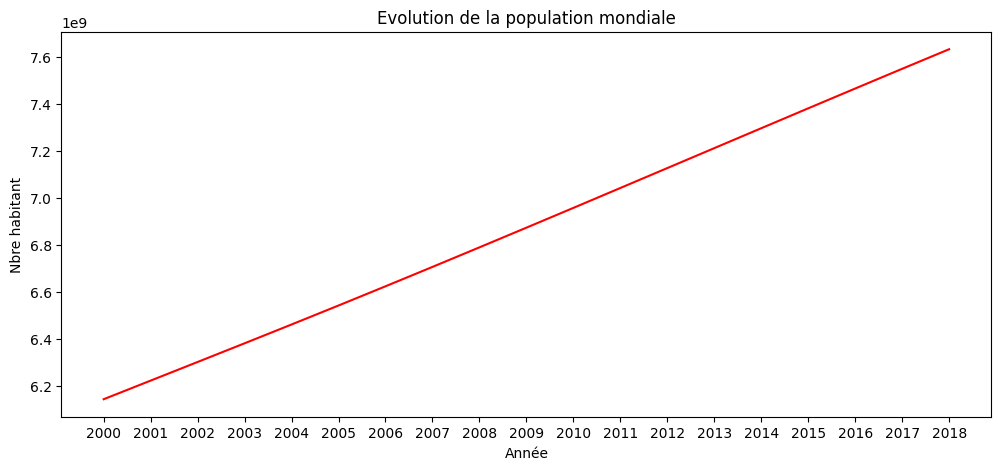

In [55]:
# Visualisation
x = pop["Année"]
y = pop["Nbre habitant"]
plt.figure(figsize=(12,5))
plt.plot(x, y, color = "r")
plt.xlabel("Année")
plt.ylabel("Nbre habitant")
plt.title("Evolution de la population mondiale")
plt.show()

* Nous observons une augmentation constante de la population pour chaque année (de l'année 2000 à 2018), 
* Nous allons maintenant calculer le poucentage d'évolution de la population pour chaque pays au cours de ces différentes années (choisir quelques années avant 2017),
* Ensuitre créer un mask pour ne filter que l'année == 2017 pour le dataframe final(popumlation) .

In [56]:
# Création d'une mask ( à discuter avec le mentor)
"""data_evo_pop = data_pop[(data_pop["Année"] == "2007") & (data_pop["Année"] == "2017")].reset_index(drop = "True")
data_evo_pop.head(5)"""

'data_evo_pop = data_pop[(data_pop["Année"] == "2007") & (data_pop["Année"] == "2017")].reset_index(drop = "True")\ndata_evo_pop.head(5)'

In [57]:
# Sélectionner des données de l'année (2010 à 2017)
data_evo_pop = data_pop.loc[data_pop["Année"].isin(["2007", "2017"])].reset_index(drop=True)
data_evo_pop.head()

,Zone,Année,Nbre habitant
0,Afghanistan,2007,27100536
1,Afghanistan,2017,36296113
2,Afrique du Sud,2007,49119759
3,Afrique du Sud,2017,57009756
4,Albanie,2007,3033998


In [58]:
# faire un groupby
evo_pop = data_evo_pop.groupby(["Zone","Année"])[["Nbre habitant"]].sum().reset_index()
evo_pop.head(5)

,Zone,Année,Nbre habitant
0,Afghanistan,2007,27100536
1,Afghanistan,2017,36296113
2,Afrique du Sud,2007,49119759
3,Afrique du Sud,2017,57009756
4,Albanie,2007,3033998


* Nous allons le présenter sous forme d'un tableau croisé dynamique

In [59]:
# Création d'un tableau croisé dynamique
df_evo_pop = evo_pop.pivot_table(values = "Nbre habitant",
                              index = "Zone",
                              columns = "Année",
                              aggfunc = np.sum
                             )

# afficher le tableau croisé
print(df_evo_pop.shape)
df_evo_pop.head(5)

(237, 2)


Année,2007,2017
Zone,,
Afghanistan,27100536.0,36296113.0
Afrique du Sud,49119759.0,57009756.0
Albanie,3033998.0,2884169.0
Algérie,34166972.0,41389189.0
Allemagne,81277830.0,82658409.0


In [60]:
# Calcul de l'évolution de la population
df_evo_pop["Évolution-pop (% en 2007-2017)"] = round((df_evo_pop["2017"] - df_evo_pop["2007"]) * 100 / df_evo_pop["2007"],2)
df_evo_pop.head(5)

Année,2007,2017,Évolution-pop (% en 2007-2017)
Zone,,,
Afghanistan,27100536.0,36296113.0,33.93
Afrique du Sud,49119759.0,57009756.0,16.06
Albanie,3033998.0,2884169.0,-4.94
Algérie,34166972.0,41389189.0,21.14
Allemagne,81277830.0,82658409.0,1.70


* Après le calcul de l'évolution de la population pour chaque pays, nous allons maintenant supprimer les deux colonnes (2010 et 2017),
* Ensuite faire une jointure avec le nouveau dataframe obtenu en créeant un mask.

In [61]:
# Suppression des colonnes
df_evo_pop = df_evo_pop.drop(columns = ["2007", "2017"], axis = 1)
print(df_evo_pop.shape)
df_evo_pop.head(5)

(237, 1)


Année,Évolution-pop (% en 2007-2017)
Zone,
Afghanistan,33.93
Afrique du Sud,16.06
Albanie,-4.94
Algérie,21.14
Allemagne,1.70


In [62]:
# Création d'une mask
data_pop_2017 = data_pop.loc[data_pop["Année"].isin(["2017"])].reset_index(drop = "True")
print(data_pop_2017.shape)
# data_pop_17 = data_pop_17.set_index("Année")
data_pop_2017.head(5)

(236, 3)


,Zone,Année,Nbre habitant
0,Afghanistan,2017,36296113
1,Afrique du Sud,2017,57009756
2,Albanie,2017,2884169
3,Algérie,2017,41389189
4,Allemagne,2017,82658409


In [63]:
# Vérification des doublons
data_pop_2017[data_pop_2017.duplicated(["Zone"])].shape

(0, 3)

* Nous n'avons pas de doublons pour la population en 2017.

In [64]:
# Faire une jointure 
data_pop_17 = pd.merge(data_pop_2017, df_evo_pop, how = "inner", on = "Zone")
print(data_pop_17.shape)
data_pop_17.head(5)

(236, 4)


,Zone,Année,Nbre habitant,Évolution-pop (% en 2007-2017)
0,Afghanistan,2017,36296113,33.93
1,Afrique du Sud,2017,57009756,16.06
2,Albanie,2017,2884169,-4.94
3,Algérie,2017,41389189,21.14
4,Allemagne,2017,82658409,1.70


In [65]:
# Suppression de la colonne année
data_pop_17 = data_pop_17.drop(columns = ["Année"])

In [66]:
# Afficher les pays qui ne figurent pas dans le jeu de données dispo_poulet_17
data_pop_17[~data_pop_17['Zone'].isin(data_poulet_17['Zone'].unique())]['Zone'].unique()

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bermudes', 'Bhoutan',
       'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Burundi',
       'Comores', 'Curaçao', 'Érythrée', 'Gibraltar', 'Groenland',
       'Guadeloupe', 'Guam', 'Guinée équatoriale', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges américaines', 'Îles Vierges britanniques',
       'Îles Wallis-et-Futuna', 'Libye', 'Liechtenstein', 'Martinique',
       'Mayotte', 'Micronésie (États fédérés de)', 'Monaco', 'Montserrat',
       'Nauru', 'Nioué', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Porto Rico', 'Qatar',
       'République arabe syrienne', 'République démocratique du Congo',
       'Réunion', 'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Asce

* Après exploration des deux tables, maintenenat nous allons aborder l'objectif de la problématique.
* Etant une entreprise française d’agroalimentaire qui souhaite se développer à l'international, dans ce cas l'environnement large ou macro-éconopique a forcément une influence sur notre activité mais laquelle exactement. Pour répondre à cette question, nous pouvons utiliser l'analyse PESTEL.
* Il s'agit d'un modèle qui permet de jauger (mesurer chaque facteur) l'influence des facteurs de l'environnement large dans lequel nous évoluons.
* Lesfacteurs considérés dans le modèle PESTELsont les suivants : Politique, Economie, Socio-culturel, Technologique, Environnemental et Légal.
***
Pour celà nous allons récupérer d'autres données dans le site de la FAO qui sont la stabilité politique par pays ainsi le PIB par habitant puis les importer pour la suite de notre analyse.
* Source : https://www.fao.org/faostat/fr/#data/FS

### 2.1.3. Dataframe "Stabilité Politique"

In [67]:
# lecture des données 
data_stabilite = pd.read_csv(r"C:\Users\diarr\Downloads\P9\Stabilite_politique.csv")
print(data_stabilite.shape)
data_stabilite.head(3)

(196, 15)


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [68]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_stabilite.isnull().sum()/data_stabilite.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Note                      100.0
Code Domaine                0.0
Domaine                     0.0
Code zone (M49)             0.0
Zone                        0.0
Code Élément                0.0
Élément                     0.0
Code Produit                0.0
Produit                     0.0
Code année                  0.0
Année                       0.0
Unité                       0.0
Valeur                      0.0
Symbole                     0.0
Description du Symbole      0.0
dtype: float64

In [69]:
# Vérification des doublons
data_stabilite[data_stabilite.duplicated()].shape

(0, 15)

In [70]:
# Vérification des doublons
data_stabilite[data_stabilite.duplicated(["Zone"])].shape

(0, 15)

In [71]:
info_stab = data_stabilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (M49)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

* Nous n'avons pas de doublons dans le dafaframe,
* Pas de valeurs manquantes à l'exception de la colonnes "Note" qu'on observe 100% de valeurs manquantes.

In [72]:
# Statistiques descriptives avec les variables némériques 
statistique = data_stabilite.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Code zone (M49),196.0,428.255102,255.081277,4.00,211.000,424.000,643.750,894.00
Code Élément,196.0,6125.000000,0.000000,6125.00,6125.000,6125.000,6125.000,6125.00
Code Produit,196.0,21032.000000,0.000000,21032.00,21032.000,21032.000,21032.000,21032.00
Code année,196.0,2017.000000,0.000000,2017.00,2017.000,2017.000,2017.000,2017.00
Année,196.0,2017.000000,0.000000,2017.00,2017.000,2017.000,2017.000,2017.00
Valeur,196.0,-0.066480,0.995164,-2.94,-0.655,0.035,0.755,1.92
Note,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Nous observons la valeur de la stabilité politique qui varie de -2,94 (minimum) à 1.92 (maximum),
* Celà signifie qu'il y'a des pays instables et des pays stables.

In [73]:
# pour trouver les éléments unique de la colonne
data_stabilite["Produit"].unique()

array(['Stabilité politique et absence de violence/terrorisme (indice)'],
      dtype=object)

* Nous allons sélectionner les colonnes qui nous semblent pertinentes pour la suite de notre analyse.

In [74]:
# créer un nouveau dataframe
data_stabilite = data_stabilite[["Zone", "Valeur"]]

# renommer la colonne
data_stab_17 = data_stabilite.rename(columns = {"Valeur" : "Stabilité-Politique"})
data_stab_17.head(5)

,Zone,Stabilité-Politique
0,Pays-Bas (Royaume des),0.92
1,Afghanistan,-2.80
2,Afrique du Sud,-0.28
3,Albanie,0.38
4,Algérie,-0.92


### 2.1.4. Dataframe "PIB (Produit Intérieure Brut"

In [75]:
data_PIB = pd.read_csv(r"C:\Users\diarr\Downloads\P9\PIB_par_habitant.csv")
print(data_PIB.shape)
data_PIB.head(3)

(186, 15)


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,55088.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2096.1,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13950.5,X,Ciffre de sources internationales,NaN


In [76]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_PIB.isnull().sum()/data_PIB.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Note                      100.0
Code Domaine                0.0
Domaine                     0.0
Code zone (M49)             0.0
Zone                        0.0
Code Élément                0.0
Élément                     0.0
Code Produit                0.0
Produit                     0.0
Code année                  0.0
Année                       0.0
Unité                       0.0
Valeur                      0.0
Symbole                     0.0
Description du Symbole      0.0
dtype: float64

In [77]:
# Vérification des doublons
data_PIB[data_PIB.duplicated()].shape

(0, 15)

In [78]:
info_PIB = data_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            186 non-null    object 
 1   Domaine                 186 non-null    object 
 2   Code zone (M49)         186 non-null    int64  
 3   Zone                    186 non-null    object 
 4   Code Élément            186 non-null    int64  
 5   Élément                 186 non-null    object 
 6   Code Produit            186 non-null    int64  
 7   Produit                 186 non-null    object 
 8   Code année              186 non-null    int64  
 9   Année                   186 non-null    int64  
 10  Unité                   186 non-null    object 
 11  Valeur                  186 non-null    float64
 12  Symbole                 186 non-null    object 
 13  Description du Symbole  186 non-null    object 
 14  Note                    0 non-null      fl

* Nous n'avons pas de doublons ni de valeurs manquantes sauf dans une colonne ("Note") où nous avons 100% de valeurs manquantes.

In [79]:
# Statistiques descriptives avec les variables némériques 
statistique = data_PIB.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Code zone (M49),186.0,427.575269,250.864252,4.0,212.5,427.0,640.000,894.0
Code Élément,186.0,6126.000000,0.000000,6126.0,6126.0,6126.0,6126.000,6126.0
Code Produit,186.0,22013.000000,0.000000,22013.0,22013.0,22013.0,22013.000,22013.0
Code année,186.0,2017.000000,0.000000,2017.0,2017.0,2017.0,2017.000,2017.0
Année,186.0,2017.000000,0.000000,2017.0,2017.0,2017.0,2017.000,2017.0
Valeur,186.0,20931.620430,22112.875438,750.8,4663.9,13492.1,29459.175,122978.0
Note,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# pour trouver les éléments unique de la colonne
data_PIB["Produit"].unique()

array(['PIB par habitant, ($ PPA internationaux constants de 2017)'],
      dtype=object)

In [81]:
# pour trouver les éléments unique de la colonne
data_PIB["Unité"].unique()

array(['I$'], dtype=object)

* Nous allons sélectionner les colonnes qui nous semblent pertinentes pour la suite de notre analyse.

In [82]:
# Créer un nouveau dataframe
data_PIB = data_PIB[["Zone", "Valeur"]]

# Renommer la colonne 
data_PIB_17 = data_PIB.rename(columns = {"Valeur" : "PIB/habitant ($)"})
data_PIB_17.head(5)

,Zone,PIB/habitant ($)
0,Pays-Bas (Royaume des),55088.6
1,Afghanistan,2096.1
2,Afrique du Sud,13950.5
3,Albanie,12771.0
4,Algérie,11809.5


## 2.2. Jointure des tables (DataFrame)

* Dans cette partie nous allons faire la jointure des diffrérentes dataframes, pour obtenir une table finale,
* Pour celà nous allons faire la jointure des tables deux à deux.

In [83]:
# les quatres (4) dataframes
print(data_poulet_17.shape), print(data_poulet_17.columns)
print("---------------------------------------------------------")
print(data_pop_17.shape), print(data_pop_17.columns)
print("---------------------------------------------------------")
print(data_stab_17.shape), print(data_stab_17.columns)
print("---------------------------------------------------------")
print(data_PIB_17.shape), print(data_PIB_17.columns)

# Créer des copies pour y travailler
df_poul_17 = data_poulet_17.copy()
df_pop_17 = data_pop_17.copy()
df_stab_17 = data_stab_17.copy()
df_PIB_17 = data_PIB_17.copy()

(172, 12)
Index(['Zone', 'Consommation-Personnelle (kg/pers/an)', 'Production-Totale',
       'Importations-Totale', 'Exportations-Totale', 'Consommation-Totale',
       'Disponibilité-Intérieure-Totale', 'Production-Poulet',
       'Importations-Poulet', 'Exportations-Poulet', 'Consommation-Poulet',
       'Disponibilité-Intérieure-Poulet'],
      dtype='object', name='Élément')
---------------------------------------------------------
(236, 3)
Index(['Zone', 'Nbre habitant', 'Évolution-pop (% en 2007-2017)'], dtype='object')
---------------------------------------------------------
(196, 2)
Index(['Zone', 'Stabilité-Politique'], dtype='object')
---------------------------------------------------------
(186, 2)
Index(['Zone', 'PIB/habitant ($)'], dtype='object')


In [84]:
# 1ère jointure avec la table population et disponibilité de poulet en 2017
df_pop_poul_17 = pd.merge(df_poul_17, df_pop_17, how = "left", on = "Zone")

# afficher le nouveau dataframe 
print(df_pop_poul_17.shape)
df_pop_poul_17.head(3)

(172, 14)


,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet,Nbre habitant,Évolution-pop (% en 2007-2017)
0,Afghanistan,3.573100e+08,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07,36296113,33.93
1,Afrique du Sud,5.564200e+08,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09,57009756,16.06
2,Albanie,1.260490e+09,4.231000e+09,8.840000e+08,1.560000e+08,3.631000e+09,4.879000e+09,1.300000e+07,38000000.0,0.0,4.700000e+07,4.700000e+07,2884169,-4.94


In [85]:
# 2ème jointure avec la table obtenue lors de la 1ère jointure et la stabilité en 2017
df_pop_poul_stab_17 = pd.merge(df_pop_poul_17, df_stab_17, how = "left", on = "Zone")

# afficher le nouveau dataframe 
print(df_pop_poul_stab_17.shape)
df_pop_poul_stab_17.head(3)

(172, 15)


,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet,Nbre habitant,Évolution-pop (% en 2007-2017),Stabilité-Politique
0,Afghanistan,3.573100e+08,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07,36296113,33.93,-2.80
1,Afrique du Sud,5.564200e+08,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09,57009756,16.06,-0.28
2,Albanie,1.260490e+09,4.231000e+09,8.840000e+08,1.560000e+08,3.631000e+09,4.879000e+09,1.300000e+07,38000000.0,0.0,4.700000e+07,4.700000e+07,2884169,-4.94,0.38


In [86]:
# 3ème jointure avec la table obtenue lors de la 2ème jointure et le PIB en 2017
df_pop_poul_stab_pib_17 = pd.merge(df_pop_poul_stab_17, df_PIB_17, how = "left", on = "Zone")

# afficher le nouveau dataframe 
print(df_pop_poul_stab_pib_17.shape)
df_final = df_pop_poul_stab_pib_17
#df_final = df_final.set_index("Zone")
df_final.head(3)

(172, 16)


,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet,Nbre habitant,Évolution-pop (% en 2007-2017),Stabilité-Politique,PIB/habitant ($)
0,Afghanistan,3.573100e+08,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07,36296113,33.93,-2.80,2096.1
1,Afrique du Sud,5.564200e+08,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09,57009756,16.06,-0.28,13950.5
2,Albanie,1.260490e+09,4.231000e+09,8.840000e+08,1.560000e+08,3.631000e+09,4.879000e+09,1.300000e+07,38000000.0,0.0,4.700000e+07,4.700000e+07,2884169,-4.94,0.38,12771.0


In [87]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((df_final.isnull().sum()/df_final.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

PIB/habitant ($)                         5.23
Stabilité-Politique                      2.91
Production-Poulet                        2.33
Exportations-Poulet                      2.33
Importations-Poulet                      1.16
Consommation-Poulet                      1.16
Disponibilité-Intérieure-Poulet          1.16
Évolution-pop (% en 2007-2017)           0.58
Zone                                     0.00
Consommation-Personnelle (kg/pers/an)    0.00
Production-Totale                        0.00
Importations-Totale                      0.00
Exportations-Totale                      0.00
Consommation-Totale                      0.00
Disponibilité-Intérieure-Totale          0.00
Nbre habitant                            0.00
dtype: float64

In [88]:
# Pourcentages des valeurs nulls
valeur_null = df_final.isnull().sum().sort_values(ascending=False)
valeur_null

PIB/habitant ($)                         9
Stabilité-Politique                      5
Production-Poulet                        4
Exportations-Poulet                      4
Importations-Poulet                      2
Consommation-Poulet                      2
Disponibilité-Intérieure-Poulet          2
Évolution-pop (% en 2007-2017)           1
Zone                                     0
Consommation-Personnelle (kg/pers/an)    0
Production-Totale                        0
Importations-Totale                      0
Exportations-Totale                      0
Consommation-Totale                      0
Disponibilité-Intérieure-Totale          0
Nbre habitant                            0
dtype: int64

In [89]:
# Statistiques descriptives avec les variables némériques 
statistique_final = df_final.describe().T
statistique_final

,count,mean,std,min,25%,50%,75%,max
Consommation-Personnelle (kg/pers/an),172.0,6.925731e+08,2.007048e+08,3.024700e+08,5.377550e+08,6.774550e+08,8.826125e+08,1.260490e+09
Production-Totale,172.0,6.550745e+10,2.248248e+11,2.100000e+07,2.032000e+09,1.071600e+10,3.225875e+10,2.147703e+12
Importations-Totale,172.0,8.599616e+09,1.991007e+10,1.000000e+06,7.470000e+08,2.665000e+09,7.654750e+09,2.059030e+11
Exportations-Totale,172.0,9.242215e+09,2.392301e+10,0.000000e+00,1.692500e+08,8.525000e+08,7.150500e+09,2.072780e+11
Consommation-Totale,172.0,3.047092e+10,1.213937e+11,2.300000e+07,1.817000e+09,6.142500e+09,1.729025e+10,1.376284e+12
Disponibilité-Intérieure-Totale,172.0,6.423005e+10,2.249771e+11,5.000000e+07,2.798250e+09,1.193650e+10,3.287850e+10,2.303613e+12
Production-Poulet,168.0,7.251905e+08,2.501457e+09,0.000000e+00,1.375000e+07,7.000000e+07,4.097500e+08,2.191400e+10
Importations-Poulet,170.0,8.952941e+07,1.866700e+08,0.000000e+00,3.000000e+06,1.600000e+07,8.125000e+07,1.069000e+09
Exportations-Poulet,168.0,1.045506e+08,4.637375e+08,-7.031000e+07,0.000000e+00,1.000000e+06,1.660250e+07,4.223000e+09
Consommation-Poulet,170.0,6.570471e+08,2.136546e+09,2.000000e+06,2.850000e+07,9.950000e+07,3.652500e+08,1.810000e+10


### Visualisation des données pour afficher leur distribution et s'il exite des valeurs aberrantes.

In [90]:
# Séparer les colonnes numériques et catégorielles
num_columns = df_final.select_dtypes(exclude = 'object').columns
cat_columns = df_final.select_dtypes(include = 'object').columns

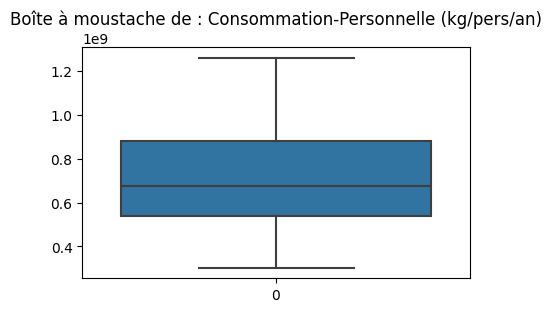

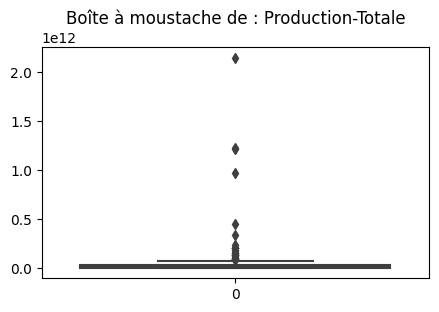

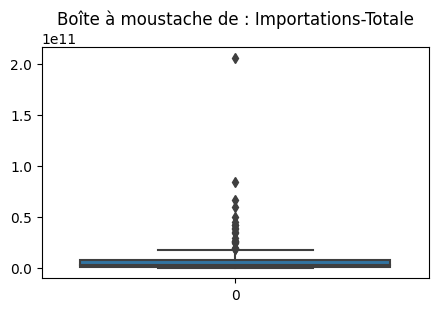

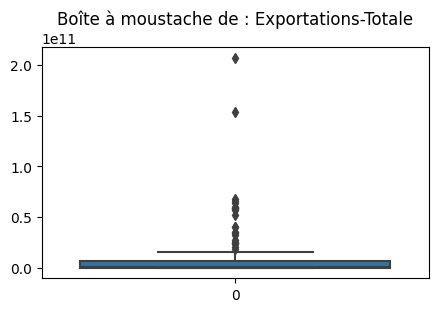

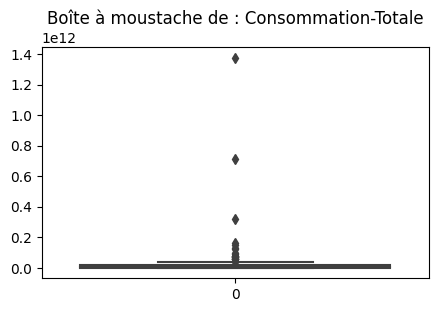

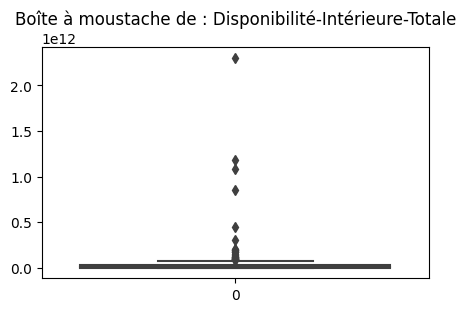

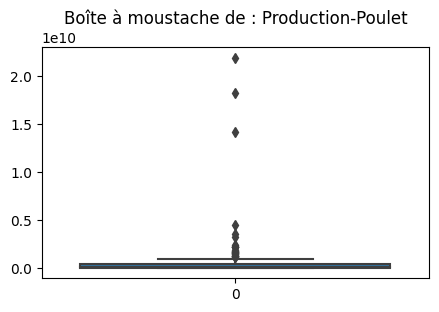

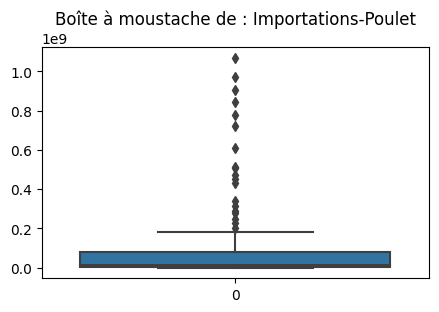

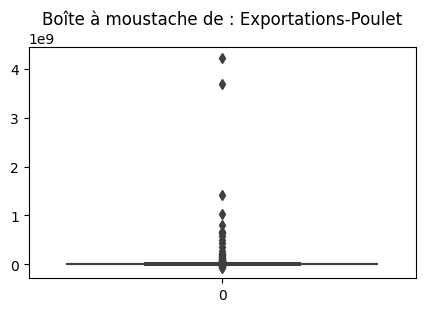

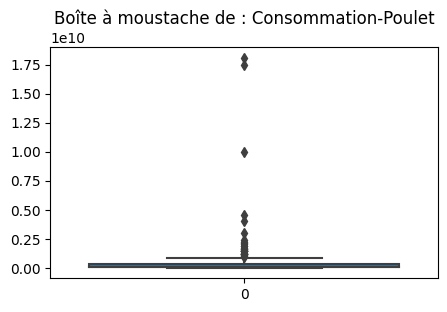

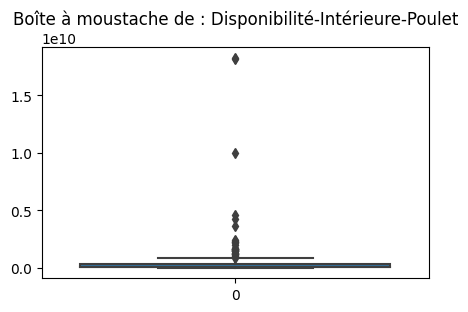

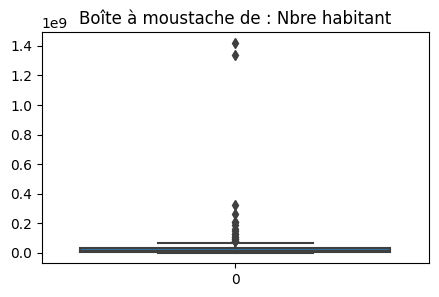

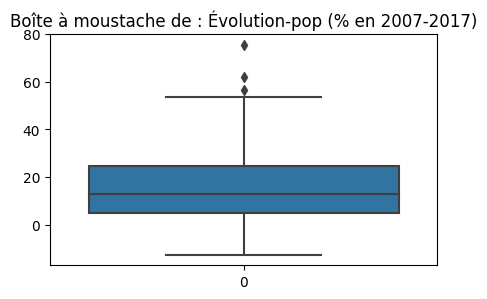

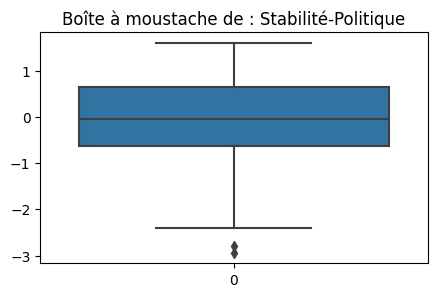

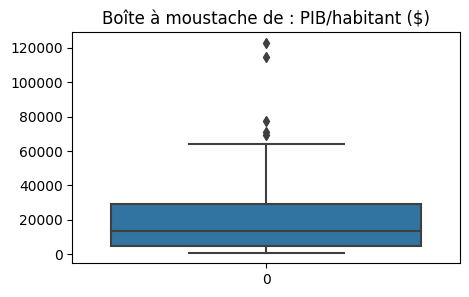

In [91]:
# boites à moustache pour afficher les outliers
for col in num_columns:
    #print(col)
    plt.figure(figsize=(5,3)) 
    sns.boxplot(df_final[col], showfliers = True)
    plt.title('Boîte à moustache de : ' + str(col)) 

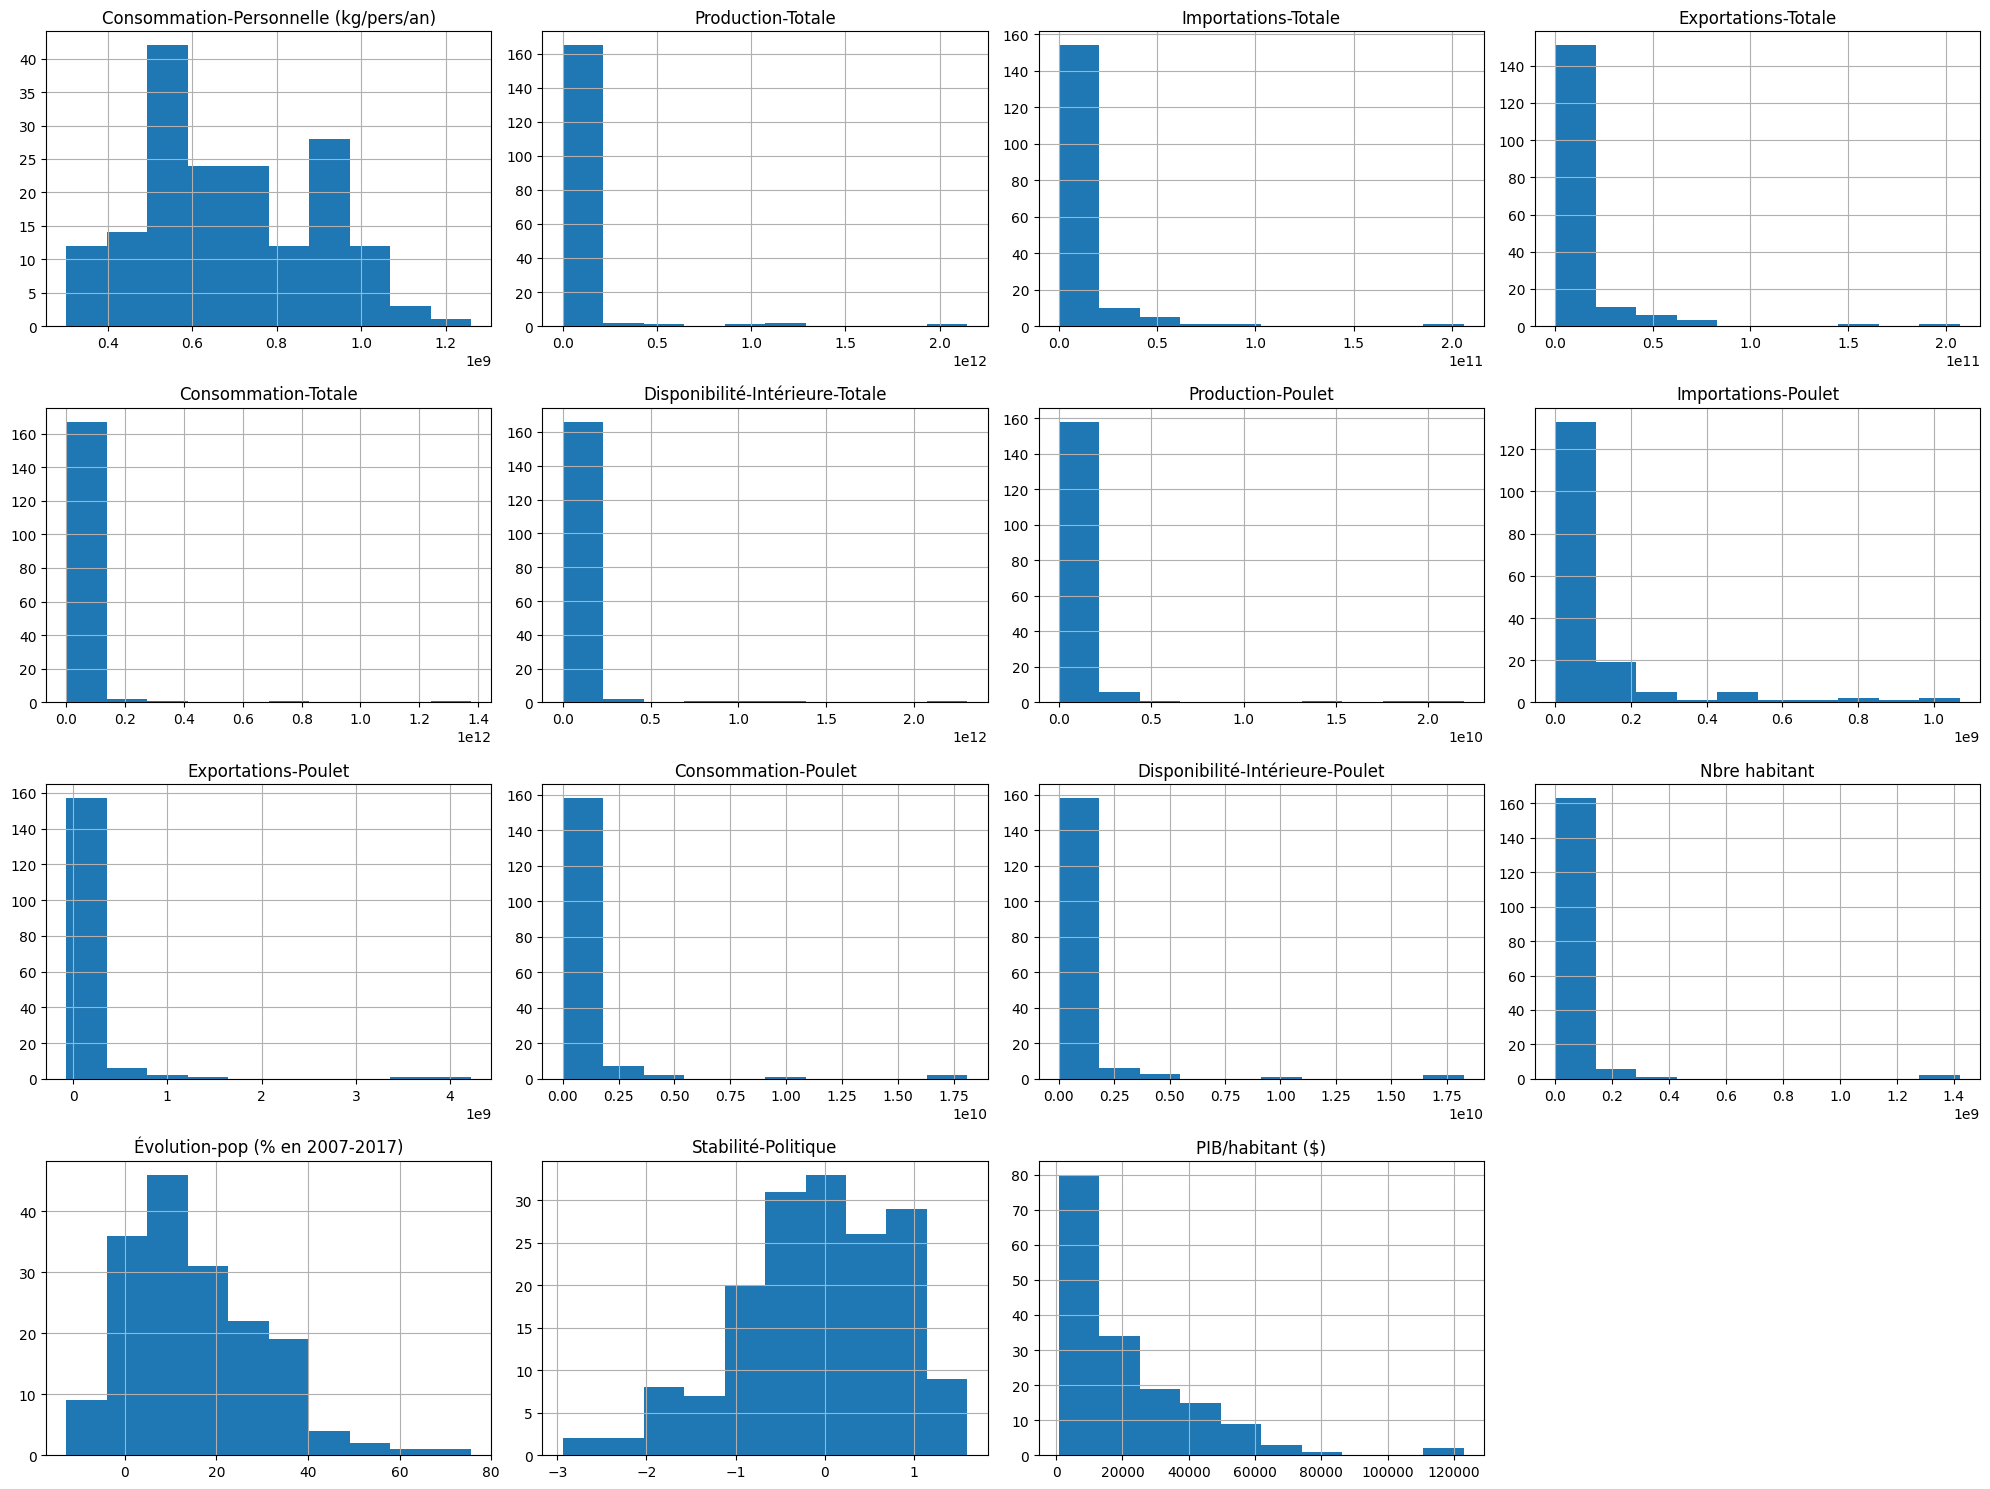

In [92]:
#def histogram(df):
    #return df.hist(figsize = (20,15))
# Visualisation
df_final.hist(figsize=(20,15))
plt.show
plt.tight_layout()

* Nous remarquons la présence de plusieurs valeurs abérrantes en plus les données ne suivent pas une distribution normale.
* Nous pouvons créer une fonction Python simple qui prend notre colonne à partir de la trame de données et génère les valeurs aberrantes :
***
Etant donné que les données ne suivent pas une distribution normale, nous calculerons les points de données aberrants à l'aide de la méthode statistique appelée intervalle interquartile (IQR) au lieu d'utiliser le score Z.

In [93]:
# Création d'une fonction pour détecter les outliers
def detect_outliers(v):
    Q1 = np.quantile(v,0.25)
    Q3 = np.quantile(v,0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ * 1.5)
    LS = Q3 + (EIQ * 1.5)
    return v[(v < LI) | (v > LS)]  

In [94]:
# Appel à la fonction pour afficher la liste des outliers 
outliers1 =  pd.DataFrame(detect_outliers(df_final["Nbre habitant"]))
print(outliers1.shape)
outliers1.head(5)

(18, 1)


,Nbre habitant
4,82658409
14,159685424
21,207833823
34,1421021791
52,145530082


* Après avoir détecter les valeurs aberrantes puis les afficher nous allons les remplacer, car les supprimer peuvent nous faire perdre beaucoup d'informations de même ne pas les supprimer peuvent biaiser nos analyses (faussez notre analyse),
* Pour celà nous allons faire une imputation par la mediane (moins sensible aux valeurs aberrantes) en fixer des limites avec la borne inférieure et supérieure de chaque boxplot (variable visualisée), ensuites toutes valeurs se trouvant en dehors de ces intervalles est considérées comme valeurs aberrantes sera remplacé par la mediane.

### Traiter les valeurs aberrantes

In [95]:
# Les différentes colonnes du dataframe
df_final.columns

Index(['Zone', 'Consommation-Personnelle (kg/pers/an)', 'Production-Totale',
       'Importations-Totale', 'Exportations-Totale', 'Consommation-Totale',
       'Disponibilité-Intérieure-Totale', 'Production-Poulet',
       'Importations-Poulet', 'Exportations-Poulet', 'Consommation-Poulet',
       'Disponibilité-Intérieure-Poulet', 'Nbre habitant',
       'Évolution-pop (% en 2007-2017)', 'Stabilité-Politique',
       'PIB/habitant ($)'],
      dtype='object')

In [96]:
# Trouvez Q1, Q3 et l'intervalle interquartile pour chaque colonne
Q1 = df_final.quantile(q = 0.25)
Q3 = df_final.quantile(q = 0.75)
EIQ = Q3 - Q1
# Définir les limites
LI = Q1 - (EIQ * 1.5)
LS = Q3 + (EIQ * 1.5)

# Appliquer les limites avec la fonction lambda pour la limite inférieure
#df_final = df_final[~((df_final < LI) | (df_final > LS)).any(axis = 1)]

# dataframe des outliers
df_outliers = df_final[((df_final < LI) | (df_final > LS)).any(axis = 1)]
print(df_outliers.shape)
df_outliers.head(3)

(68, 16)


,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet,Nbre habitant,Évolution-pop (% en 2007-2017),Stabilité-Politique,PIB/habitant ($)
0,Afghanistan,357310000.0,1.160900e+10,4.555000e+09,6.010000e+08,1.296800e+10,1.513900e+10,2.800000e+07,29000000.0,-1530000.0,5.500000e+07,5.700000e+07,36296113,33.93,-2.80,2096.1
1,Afrique du Sud,556420000.0,6.845500e+10,9.020000e+09,1.096800e+10,3.172600e+10,6.684000e+10,1.667000e+09,514000000.0,63000000.0,2.035000e+09,2.118000e+09,57009756,16.06,-0.28,13950.5
3,Algérie,798710000.0,2.676300e+10,1.971800e+10,7.430000e+08,3.305600e+10,4.536500e+10,2.750000e+08,2000000.0,0.0,2.640000e+08,2.770000e+08,41389189,21.14,-0.92,11809.5


* Nous avons 68 zones (lignes) qui ont tous des valeurs aberrantes,
* Supprimer toutes ces lignes nous fera perdre pas mal d'infomations, le mieux est de les traiter

In [97]:
# Création de la fonction pour faire une imputation 
def impute_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper = df[~(df>(Q3+1.5*IQR))].max()
    lower = df[~(df<(Q1-1.5*IQR))].min()
    df = np.where(df > upper,
      df.median(),
      np.where(
        df < lower,
        df.median(),
        df
        )
      )
    return df

In [98]:
# Remplacer les valeurs aberrantes dans chaque colonne
df_final['Consommation-Personnelle (kg/pers/an)'] = impute_outliers_IQR(df_final['Consommation-Personnelle (kg/pers/an)'])
df_final['Nbre habitant'] = impute_outliers_IQR(df_final['Nbre habitant'])
df_final['Évolution-pop (% en 2007-2017)'] = impute_outliers_IQR(df_final['Évolution-pop (% en 2007-2017)'])
df_final['Production-Totale'] = impute_outliers_IQR(df_final['Production-Totale'])
df_final['Importations-Totale'] = impute_outliers_IQR(df_final['Importations-Totale'])
df_final['Exportations-Totale'] = impute_outliers_IQR(df_final['Exportations-Totale'])
df_final['Consommation-Totale'] = impute_outliers_IQR(df_final['Consommation-Totale'])
df_final['Disponibilité-Intérieure-Totale'] = impute_outliers_IQR(df_final['Disponibilité-Intérieure-Totale'])
df_final['Production-Poulet'] = impute_outliers_IQR(df_final['Production-Poulet'])
df_final['Disponibilité-Intérieure-Poulet'] = impute_outliers_IQR(df_final['Disponibilité-Intérieure-Poulet'])
df_final['Importations-Poulet'] = impute_outliers_IQR(df_final['Importations-Poulet'])
df_final['Exportations-Poulet'] = impute_outliers_IQR(df_final['Exportations-Poulet'])
df_final['Consommation-Poulet'] = impute_outliers_IQR(df_final['Consommation-Poulet'])
df_final['Stabilité-Politique'] = impute_outliers_IQR(df_final['Stabilité-Politique'])
df_final['PIB/habitant ($)'] = impute_outliers_IQR(df_final['PIB/habitant ($)'])

In [99]:
# "Importations-Poulet", "Exportations-Poulet", "Consommation-Poulet"

* Après l'imputation, nous allons vérifier le résultat avec la fonction "describe()"

In [100]:
# Statistiques descriptives avec les variables némériques après traitement
statistique_final = df_final.describe().T
statistique_final

,count,mean,std,min,25%,50%,75%,max
Consommation-Personnelle (kg/pers/an),172.0,6.925731e+08,2.007048e+08,3.024700e+08,5.377550e+08,6.774550e+08,8.826125e+08,1.260490e+09
Production-Totale,172.0,1.300601e+10,1.474385e+10,2.100000e+07,2.032000e+09,1.069450e+10,1.525200e+10,7.413600e+10
Importations-Totale,172.0,3.282616e+09,3.758511e+09,1.000000e+06,7.470000e+08,2.663000e+09,3.992500e+09,1.766000e+10
Exportations-Totale,172.0,2.094131e+09,3.254086e+09,0.000000e+00,1.692500e+08,8.507500e+08,1.987250e+09,1.586200e+10
Consommation-Totale,172.0,8.070529e+09,9.083928e+09,2.300000e+07,1.817000e+09,6.097250e+09,9.653000e+09,3.850200e+10
Disponibilité-Intérieure-Totale,172.0,1.360401e+10,1.452170e+10,5.000000e+07,2.798250e+09,1.192275e+10,1.691075e+10,7.792100e+10
Production-Poulet,168.0,1.108036e+08,1.690077e+08,0.000000e+00,1.375000e+07,6.950000e+07,1.055000e+08,9.180000e+08
Importations-Poulet,170.0,3.148235e+07,4.282595e+07,0.000000e+00,3.000000e+06,1.600000e+07,3.775000e+07,1.820000e+08
Exportations-Poulet,168.0,2.267679e+06,6.695543e+06,-1.798000e+07,0.000000e+00,1.000000e+06,2.000000e+06,3.500000e+07
Consommation-Poulet,170.0,1.242588e+08,1.521393e+08,2.000000e+06,2.850000e+07,9.875000e+07,1.387500e+08,8.540000e+08


* Comparé au premier résultat avant l'imputation, nous pouvons dire que la fonction a bien réussi.

### Remplacer les valeurs manquantes

In [101]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((df_final.isnull().sum()/df_final.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

PIB/habitant ($)                         5.23
Stabilité-Politique                      2.91
Production-Poulet                        2.33
Exportations-Poulet                      2.33
Importations-Poulet                      1.16
Consommation-Poulet                      1.16
Disponibilité-Intérieure-Poulet          1.16
Évolution-pop (% en 2007-2017)           0.58
Zone                                     0.00
Consommation-Personnelle (kg/pers/an)    0.00
Production-Totale                        0.00
Importations-Totale                      0.00
Exportations-Totale                      0.00
Consommation-Totale                      0.00
Disponibilité-Intérieure-Totale          0.00
Nbre habitant                            0.00
dtype: float64

In [102]:
# somme des valeurs nulls
valeur_null = df_final.isnull().sum().sort_values(ascending=False)
valeur_null

PIB/habitant ($)                         9
Stabilité-Politique                      5
Production-Poulet                        4
Exportations-Poulet                      4
Importations-Poulet                      2
Consommation-Poulet                      2
Disponibilité-Intérieure-Poulet          2
Évolution-pop (% en 2007-2017)           1
Zone                                     0
Consommation-Personnelle (kg/pers/an)    0
Production-Totale                        0
Importations-Totale                      0
Exportations-Totale                      0
Consommation-Totale                      0
Disponibilité-Intérieure-Totale          0
Nbre habitant                            0
dtype: int64

In [103]:
# Créer un dataframe avec les données manquantes (NAN)
donnes_null = df_final[df_final.isnull().any(axis=1)]
print(donnes_null.shape)

# afficher les 14 lignes
donnes_null.head(14)

(14, 16)


,Zone,Consommation-Personnelle (kg/pers/an),Production-Totale,Importations-Totale,Exportations-Totale,Consommation-Totale,Disponibilité-Intérieure-Totale,Production-Poulet,Importations-Poulet,Exportations-Poulet,Consommation-Poulet,Disponibilité-Intérieure-Poulet,Nbre habitant,Évolution-pop (% en 2007-2017),Stabilité-Politique,PIB/habitant ($)
33,"Chine, Taiwan Province de",640370000.0,1.317000e+10,1.442900e+10,1.669000e+09,1.516200e+10,2.536500e+10,652000000.0,161000000.0,8000000.0,785000000.0,785000000.0,23674546.0,3.26,NaN,NaN
34,"Chine, continentale",968520000.0,1.071600e+10,2.665000e+09,8.525000e+08,6.142500e+09,1.193650e+10,70000000.0,16000000.0,1000000.0,99500000.0,100000000.0,9757833.0,5.57,NaN,NaN
40,Cuba,844620000.0,3.066700e+10,4.582000e+09,1.227000e+09,9.575000e+09,3.358500e+10,29000000.0,16000000.0,1000000.0,269000000.0,342000000.0,11339254.0,0.78,0.65,NaN
43,Djibouti,431320000.0,8.300000e+07,1.497000e+09,1.910000e+08,4.030000e+08,1.347000e+09,NaN,3000000.0,NaN,3000000.0,3000000.0,944099.0,17.21,-0.74,4451.7
92,Maldives,513840000.0,1.530000e+08,2.810000e+08,9.100000e+07,2.500000e+08,3.300000e+08,NaN,12000000.0,NaN,7000000.0,12000000.0,496402.0,48.10,0.23,18973.6
108,Nouvelle-Calédonie,584490000.0,8.900000e+07,1.490000e+08,5.000000e+06,1.570000e+08,2.380000e+08,1000000.0,9000000.0,1000000.0,11000000.0,11000000.0,277150.0,13.90,NaN,NaN
113,Ouzbékistan,923980000.0,6.500000e+07,1.000000e+07,0.000000e+00,7.100000e+07,7.500000e+07,NaN,NaN,NaN,NaN,NaN,31959785.0,17.48,-0.24,6840.7
117,Pays-Bas,945030000.0,4.874100e+10,2.665000e+09,8.525000e+08,1.609300e+10,5.036900e+10,70000000.0,16000000.0,1000000.0,346000000.0,372000000.0,17021347.0,3.12,NaN,NaN
120,Polynésie française,678750000.0,2.300000e+08,1.570000e+08,9.000000e+06,1.860000e+08,3.740000e+08,1000000.0,15000000.0,0.0,13000000.0,15000000.0,276102.0,5.09,NaN,NaN
130,République démocratique populaire lao,888620000.0,1.750000e+08,1.000000e+06,0.000000e+00,1.750000e+08,1.760000e+08,NaN,NaN,NaN,NaN,NaN,6953035.0,16.96,0.40,7211.3


* Nous avons 14 pays (zone) qui des données manquantes;
* Avec 1 pays qu'on ne connaissent pas l'évolution de la population en 2010-2017,
* 5 pays avec une stabilité politique inconnue,
* Enfin 9 pays avec un produit intérieur brut inconnue.

In [104]:
"""# Suppression des lignes avec plusieurs valeurs manquantes
df_final = df_final.drop(index = ([116, 130]), axis = 0)"""

'# Suppression des lignes avec plusieurs valeurs manquantes\ndf_final = df_final.drop(index = ([116, 130]), axis = 0)'

* Après suppression des ces lignes (avec plusieurs valeurs manquantes) nous allons remplacer toutes ces valeurs manquantes par la mediane qui est moins sensible aux valeurs aberrantes.

In [105]:
# Remplacer toutes les valeurs manquantes par la mediane
#df_final = df_final.fillna(0)
df_final = df_final.fillna(df_final.median())

# afficher le nombre total de valeurs manquantes
print(df_final.isnull().sum().sum())

0


# 3. Exportation des données

* Après les différentes étapes de traitement des tables effectuéés, nous allons sauvegarder le fichier final (données finales obtenues) au format CSV afin de l'exporter pour continuer notre analyse.

In [106]:
# Sauvegarde des données
print(df_final.shape)
df_final.to_csv(r"C:\Users\diarr\Downloads\P9\df_final.csv", index = False)

(172, 16)


Source : 
* https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
* https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
* https://www.statology.org/remove-outliers-python/
* https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/